In [ ]:
# https://www.youtube.com/watch?v=tZA5nVMITeM&list=PLPTV0NXA_ZSj6tNyn_UadmUeU3Q3oR-hu&index=31

upto lecture 28 complete

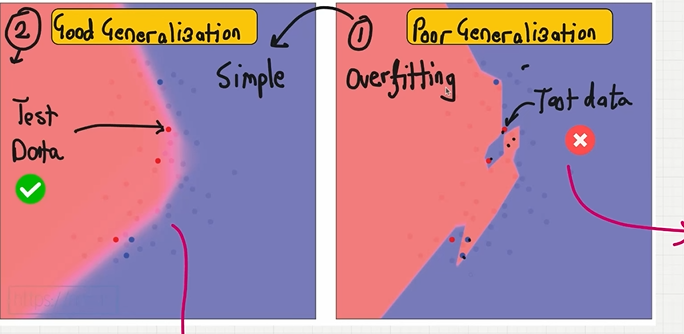
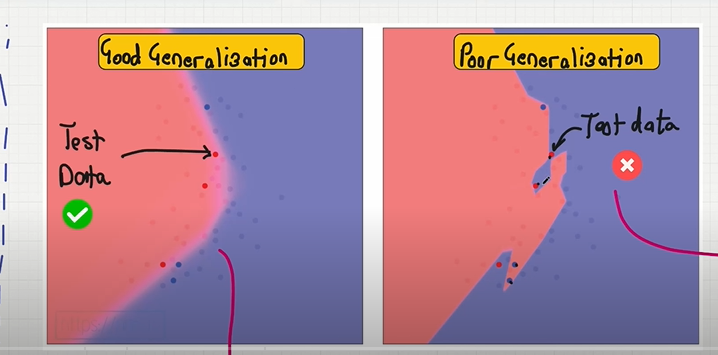

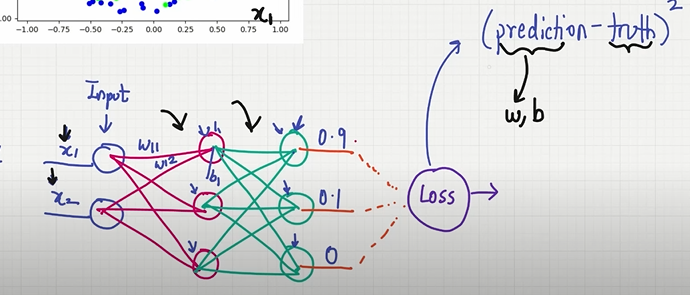

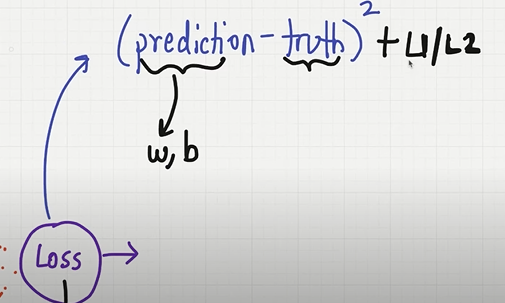

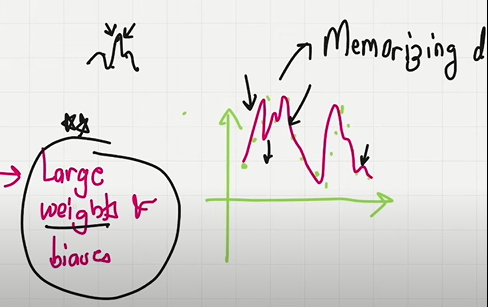

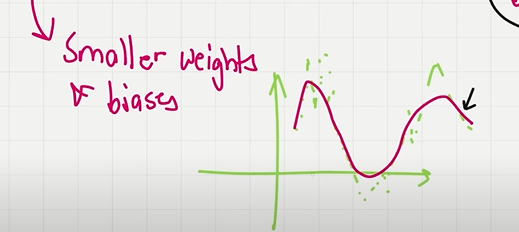

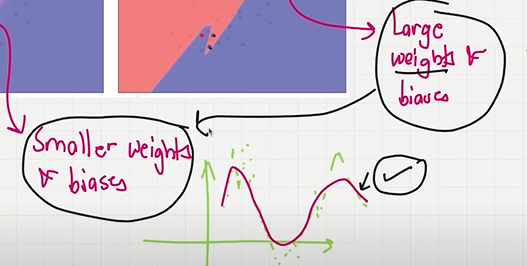

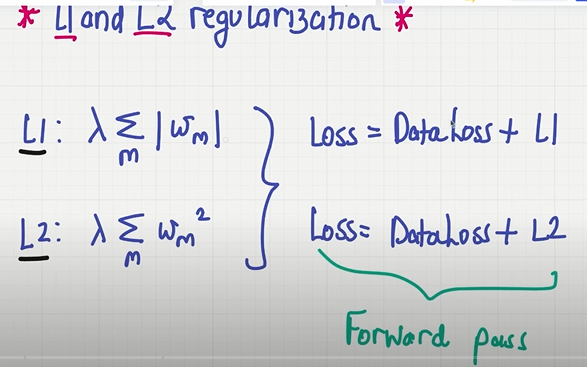

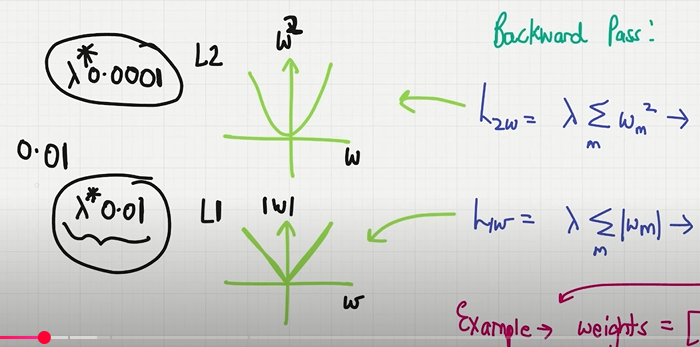

backword pass

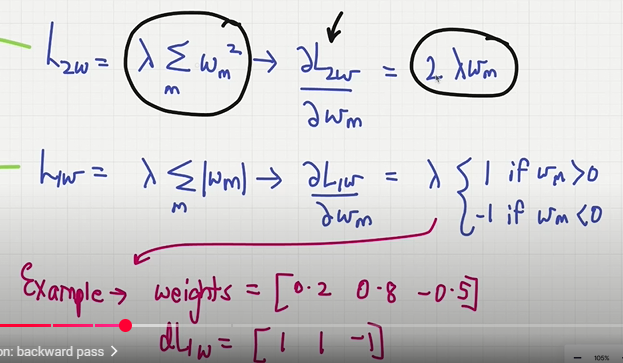

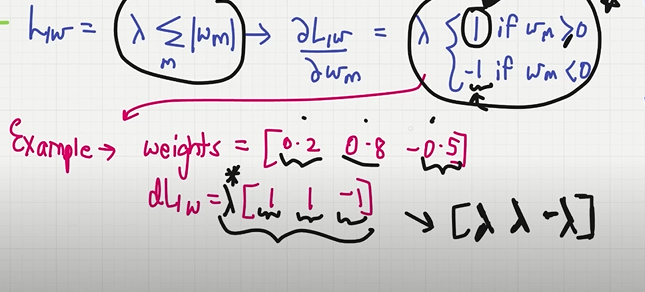

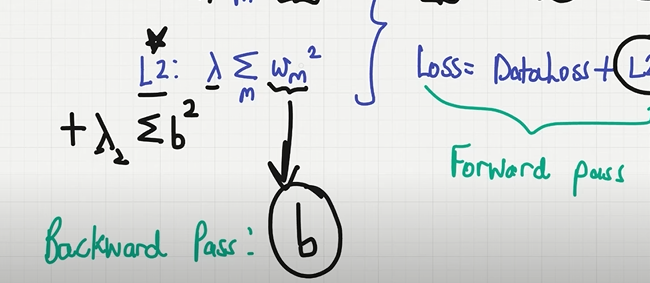

Modify the layer class to include the regularaization

regularaization loss

In [1]:
import numpy as np
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2
    # forward pass
    def forward(self, inputs):
        # remember inputs values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

In [1]:
from nnfs.datasets import spiral_data

from ReLU_Act import Activation_ReLU
from SGD_optimizer import Optimizer_SGD
from Softmax_Act import Activation_Softmax
from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy
from softmax_loss_catcrossentropy import Activation_Softmax_Loss_CategoricalCrossentropy
from ADAGRAD_optimizer import Optimizer_Adagrad
from RMSProp_optimizer import Optimizer_RMSprop
from Adam_optimizer import Optimizer_Adam

In [2]:
from Dense_Layer import Layer_Dense

In [3]:
layer = Layer_Dense(2, 64, weight_regularizer_l2 = 5e-4, bias_regularizer_l2 = 5e-4)

In [4]:
X , y = spiral_data(samples=100, classes = 3)

In [5]:
layer.forward(inputs=X)

In [7]:
#create dataset
import numpy as np
X , y = spiral_data(samples=100, classes = 3)

# Create Dense layer with 2 input features and 64 output  values

## NO REGULARAIZATION

# dense1 = Layer_Dense(2, 64)

# Create Dense layer with 64 input features and 3 output values
# with regularaization
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

# Create relu activation function
activation1 = Activation_ReLU()

# create 2nd dense layer with 64 input features and 3 output values
dense2 = Layer_Dense(64, 3)

# Create softmax classifier's combined loss and activation

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()


# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.02, decay=5e-7)

# Train in loop

for epoch in range(100):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    data_loss = loss_activation.forward(dense2.output, y)

    # Calculate reularization penalty
    regularization_loss = (loss_activation.regularization_loss(dense1) + loss_activation.regularization_loss(dense2))
    
    # Calculate total loss
    total_loss = data_loss + regularization_loss

    # calculate accuracy from output of activation2 and targets
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accu_val = np.mean(predictions == y)

    if not epoch % 10:
        print(f'epoch: {epoch}, ' +
              f'acc: {accu_val:.3f}, ' +
              f'loss: {total_loss:.3f}, ' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

    
    
    # validate the model
    # create test dataset 
    X_test, y_test = spiral_data(samples=100, classes = 3)
    # Forward pass
    dense1.forward(X_test)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    # perform a forward pass through the activation/loss function
    data_loss_test = loss_activation.forward(dense2.output, y_test)

    #calculate accuracy from output of activation2 and targets calculate values along first axis
    predictions_test = np.argmax(loss_activation.output, axis=1)
    if len(y_test.shape) == 2:
        y_test = np.argmax(y_test, axis=1)
    accuracy_test = np.mean(predictions_test == y_test)
    print(f'epoch: {epoch}, ' +
              f'val_acc: {accuracy_test:.3f}')



    # predictions = np.argmax(loss_activation.output, axis=1)
    # if len(y_test.shape) == 2:
    #     y_test = np.argmax(y_test, axis=1)
    # accuracy_test = np.mean(predictions == y_test)
    # print(f'epoch: {epoch}, ' +
    #           f'val_acc: {accuracy_test:.3f}')





epoch: 0, acc: 0.353, loss: 1.099, data_loss: 1.099, reg_loss: 0.000, lr: 0.02
epoch: 0, val_acc: 0.333
epoch: 1, val_acc: 0.390
epoch: 2, val_acc: 0.403
epoch: 3, val_acc: 0.383
epoch: 4, val_acc: 0.417
epoch: 5, val_acc: 0.387
epoch: 6, val_acc: 0.403
epoch: 7, val_acc: 0.393
epoch: 8, val_acc: 0.443
epoch: 9, val_acc: 0.430
epoch: 10, acc: 0.410, loss: 1.072, data_loss: 1.070, reg_loss: 0.001, lr: 0.019999910000404998
epoch: 10, val_acc: 0.417
epoch: 11, val_acc: 0.417
epoch: 12, val_acc: 0.427
epoch: 13, val_acc: 0.393
epoch: 14, val_acc: 0.450
epoch: 15, val_acc: 0.383
epoch: 16, val_acc: 0.413
epoch: 17, val_acc: 0.430
epoch: 18, val_acc: 0.450
epoch: 19, val_acc: 0.403
epoch: 20, acc: 0.433, loss: 1.067, data_loss: 1.066, reg_loss: 0.001, lr: 0.019999810001804983
epoch: 20, val_acc: 0.423
epoch: 21, val_acc: 0.410
epoch: 22, val_acc: 0.403
epoch: 23, val_acc: 0.440
epoch: 24, val_acc: 0.417
epoch: 25, val_acc: 0.423
epoch: 26, val_acc: 0.397
epoch: 27, val_acc: 0.457
epoch: 28, 